In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import chardet
rawdata = open("spam1.csv", "rb").read()
print(chardet.detect(rawdata))
    

{'encoding': 'Windows-1252', 'confidence': 0.7257971165545478, 'language': ''}


In [60]:
df = pd.read_csv("spam1.csv" , encoding='Windows-1252')

In [61]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [62]:
df.drop("Unnamed: 2" , axis=1 ,inplace=True)
df.drop("Unnamed: 4" , axis=1,inplace=True)
df.drop("Unnamed: 3" , axis=1,inplace=True)

In [63]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

In [13]:
df['isSpam'] = df.v1.map({"ham":0 , "spam" :1})

In [14]:
df['length'] = df.v2.apply(lambda x : len(x.split()))

In [15]:
df

,v1,v2,isSpam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,20
1,ham,Ok lar... Joking wif u oni...,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,28
3,ham,U dun say so early hor... U c already then say...,0,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,13
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,30
5568,ham,Will ÃŒ_ b going to esplanade fr home?,0,8
5569,ham,"Pity, * was in mood for that. So...any other s...",0,10
5570,ham,The guy did some bitching but I acted like i'd...,0,26


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

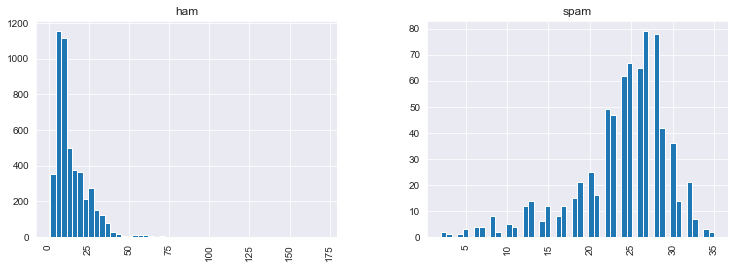

In [16]:
sns.set_style('darkgrid')
df.hist(column='length' , by='v1', bins=50,figsize=(12,4))

In [18]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:

from nltk.corpus import stopwords
stopwords.words("english")[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [30]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
text = df['v2'][5]
print(text)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Ã¥Â£1.50 to rcv


In [26]:
no_punc = [char for char in text if char not in string.punctuation]
no_punc = ''.join(no_punc)

In [34]:
no_punc

'FreeMsg Hey there darling its been 3 weeks now and no word back Id like some fun you up for it still Tb ok XxX std chgs to send Ã¥Â£150 to rcv'

In [38]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english' , ignore_stopwords=True)
stemmer.stem(no_punc)

'freemsg hey there darling its been 3 weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send Ã¥Â£150 to rcv'

In [33]:
bag = [x for x in no_punc.split() if x not in stopwords.words("english")]
print(bag)

['FreeMsg', 'Hey', 'darling', '3', 'weeks', 'word', 'back', 'Id', 'like', 'fun', 'still', 'Tb', 'ok', 'XxX', 'std', 'chgs', 'send', 'Ã¥Â£150', 'rcv']


In [47]:
from nltk.stem.snowball import SnowballStemmer
snowBall = SnowballStemmer('english')
print(snowBall.stem("having"))
print(snowBall.stem("have"))
print(snowBall.stem("fishing"))
print(snowBall.stem("fish"))
print(snowBall.stem("fishes"))

have
have
fish
fish
fish


In [55]:
def tokenisation(text):
    """
    first it will take a text and remove all the punctuations 
    then it will rejoin it
    then it will remove all the stopwords
    then on that, we will try to do stemming
    """
    
    no_punc = [char for char in text if char not in string.punctuation]  #removing the punctuation
    no_punc_str = ''.join(no_punc)
    stop_words = stopwords.words("english") 
    res = [word for word in no_punc_str.split() if word.lower() not in stop_words] #removing the stopwords
    res = [snowBall.stem(word) for word in res ] #using stemming
    
    
    return res

In [64]:
print(tokenisation("she is having a child go got that is"))

['child', 'go', 'got']


In [65]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [66]:
df['v2'] = df['v2'].apply(tokenisation)

In [67]:
df.head()

,v1,v2
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, dont, think, goe, usf, live, around, tho..."


In [126]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91962\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [132]:
df.head()

,v1,v2,isSpam,length
0,ham,"[Go, jurong, point, crazy, Available, bugis, n...",0,20
1,ham,"[Ok, lar, Joking, wif, u, oni]",0,6
2,spam,"[Free, entry, wkly, comp, win, FA, Cup, final,...",1,28
3,ham,"[U, dun, say, early, hor, U, c, already, say]",0,11
4,ham,"[Nah, I, dont, think, goes, usf, lives, around...",0,13


In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [69]:
bow_tranformer = CountVectorizer(analyzer= tokenisation).fit(df['v2'])

In [70]:
df

,v1,v2
0,ham,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,"[ok, lar, joke, wif, u, oni]"
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"[nah, dont, think, goe, usf, live, around, tho..."
...,...,...
5567,spam,"[2nd, time, tri, 2, contact, u, u, Ã¥Â£750, poun..."
5568,ham,"[Ã¬, b, go, esplanad, fr, home]"
5569,ham,"[piti, mood, soani, suggest]"
5570,ham,"[guy, bitch, act, like, id, interest, buy, som..."


In [73]:
print(len(bow_tranformer.vocabulary_))

5111


In [74]:
mess = df['v2'][4]

In [75]:
mess

['nah', 'dont', 'think', 'goe', 'usf', 'live', 'around', 'though']

In [84]:
bow = bow_tranformer.transform(mess)

In [86]:
print(bow.shape)

(8, 5111)


In [103]:
mail_bow = bow_tranformer.transform(df['v2'])

In [87]:
print('Shape of Sparse Matrix: ', mail_bow.shape)
print('Amount of Non-Zero occurences: ', mail_bow.nnz)

Shape of Sparse Matrix:  (5572, 5111)
Amount of Non-Zero occurences:  5567


In [104]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer().fit(mail_bow)
tfidf_t = tfidf.transform(mail_bow)


In [108]:
tfidf_t.shape

(5572, 5111)

In [109]:
#training a model

In [110]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(tfidf_t, df['v1'])

In [112]:
print('predicted:', spam_detect_model.predict(tfidf_t)[3])
print('expected:', df.v1[3])

predicted: ham
expected: ham


In [113]:
print('predicted:', spam_detect_model.predict(tfidf_t)[10])
print('expected:', df.v1[10])

predicted: ham
expected: ham


In [114]:
##model evaluation

In [120]:
all_predictions = spam_detect_model.predict(tfidf_t)


In [123]:
count = 0
for x in all_predictions:
    if x=='spam':
        count+=1
print(count)

29


In [119]:
from sklearn.metrics import classification_report
print (classification_report(df.v1, all_predictions))

              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4825
        spam       1.00      0.04      0.07       747

    accuracy                           0.87      5572
   macro avg       0.94      0.52      0.50      5572
weighted avg       0.89      0.87      0.82      5572

